In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [177]:
train_df = pd.read_csv('train.csv',index_col=False)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
test_df = pd.read_csv('test.csv',index_col=False)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [179]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [180]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [181]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

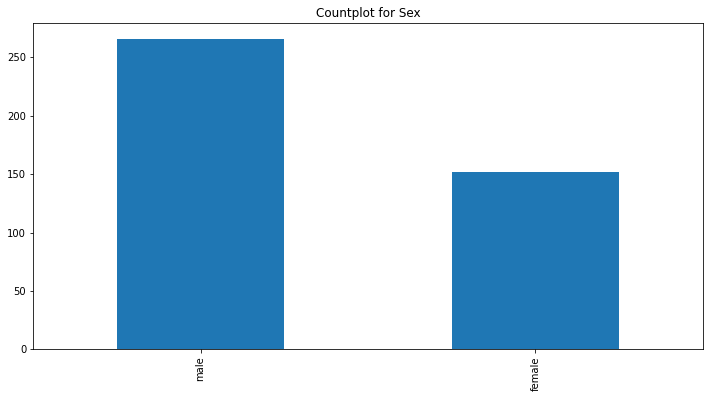

In [182]:
plt.figure(figsize = (12,6))
fig = test_df['Sex'].value_counts().plot(kind = "bar")
plt.title("Countplot for Sex")
plt.show(fig)

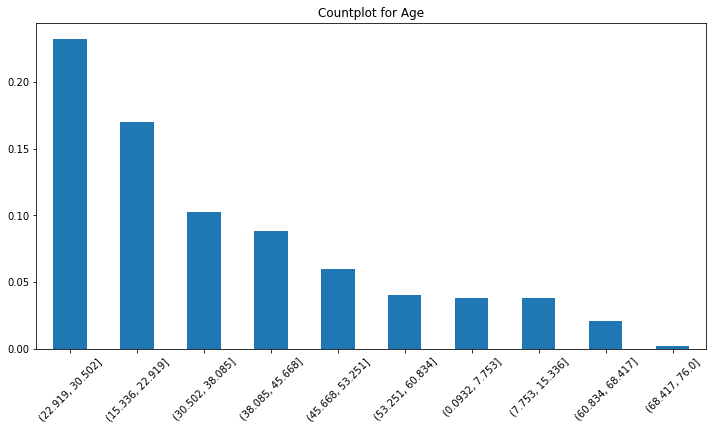

In [183]:
plt.figure(figsize = (12,6))
fig = test_df['Age'].value_counts(normalize = True , bins = 10).plot(kind = "bar")
plt.title("Countplot for Age")
plt.xticks(rotation = 45)
plt.show(fig)

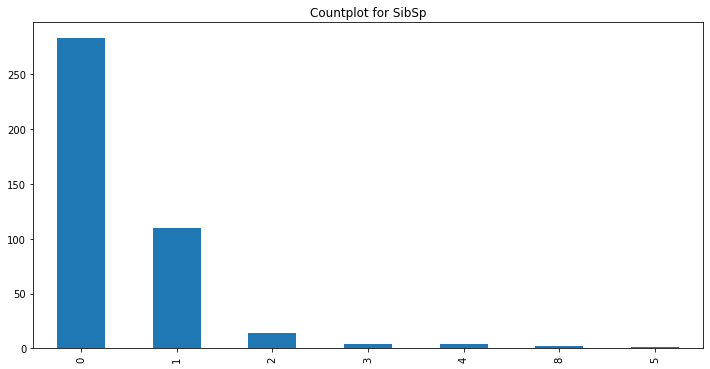

In [184]:
plt.figure(figsize = (12,6))
fig = test_df['SibSp'].value_counts().plot(kind = "bar")
plt.title("Countplot for SibSp")
plt.show(fig)

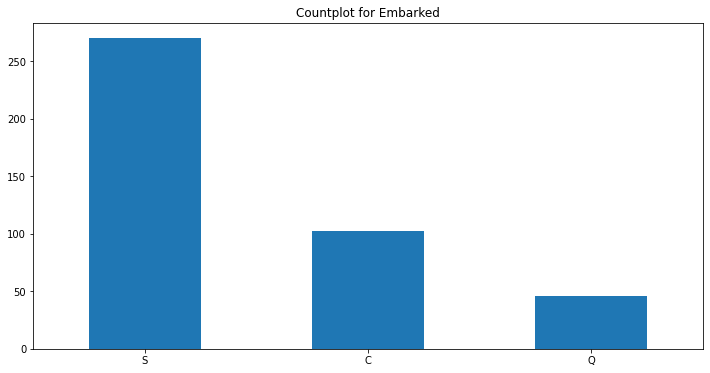

In [185]:
plt.figure(figsize = (12,6))
fig = test_df['Embarked'].value_counts().plot(kind = "bar")
plt.title("Countplot for Embarked")
plt.xticks(rotation = 0)
plt.show(fig)

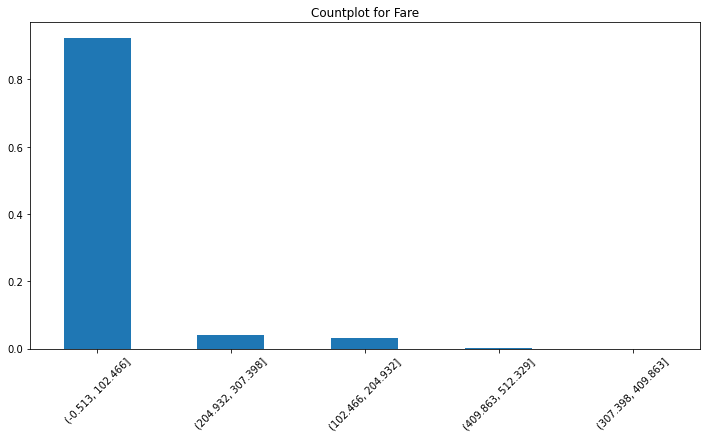

In [186]:
plt.figure(figsize = (12,6))
fig = test_df['Fare'].value_counts(normalize = True , bins = 5).plot(kind = "bar")
plt.title("Countplot for Fare")
plt.xticks(rotation = 45)
plt.show(fig)

In [187]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


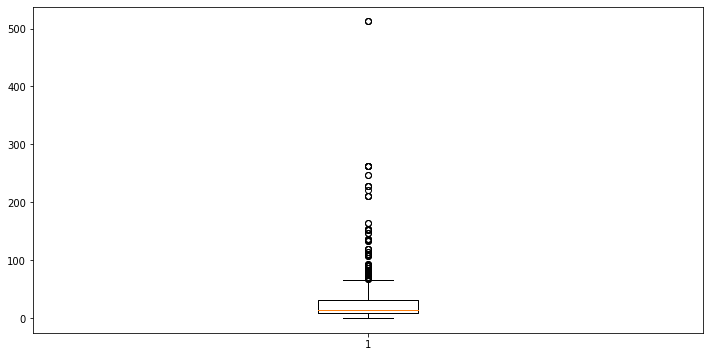

In [188]:

data =  train_df['Fare'] 
fig = plt.figure(figsize =(12, 6))
plt.boxplot(data) 
plt.show()


### Gender column

In [189]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [190]:
train_df.sample(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S
515,516,0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,D46,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S


In [191]:
train_df["Gender_Name"] = np.nan

In [192]:
gender_words = ["mr" , "mrs" , "dr" , "master" , "miss"]

for index , row in train_df.iterrows() :
  name = row["Name"].split()
  
  for word in name :    
    word = word.strip().lower().replace(".","") 

    if word in gender_words :
      train_df.loc[index , "Gender_Name"] = gender_words.index(word) + 1      
    #else:
      #counter += 0
      #train_df.loc[index , "Gender_Name"] = 0

train_df['Gender_Name'].mask(train_df['Gender_Name'].isnull() == True, 0, inplace=True)


In [193]:
train_df["Gender_Name"].value_counts()

1.0    517
5.0    182
2.0    125
4.0     40
0.0     20
3.0      7
Name: Gender_Name, dtype: int64

In [194]:
heights = []

for i in range(0,6) :
  train_df_copy = train_df.loc[train_df['Gender_Name'] == i]
  heights.append(round(np.mean(train_df_copy["Survived"]),2))

print(heights)

[0.45, 0.16, 0.79, 0.43, 0.57, 0.7]


In [195]:
x_df = [int(x) for x in train_df["Gender_Name"].unique()]
x_df.sort()


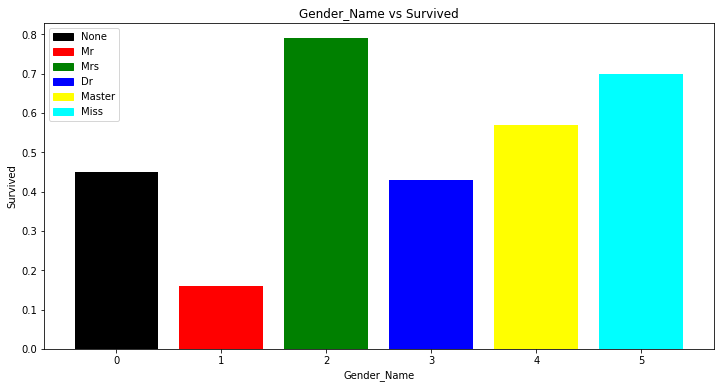

In [196]:

colors = ["red"]*6

plt.figure(figsize=(12,6))
plt.bar(x_df , heights , label = labels , color=['black', 'red', 'green', 'blue', 'yellow' , 'cyan'])
plt.title("Gender_Name vs Survived")
plt.xlabel("Gender_Name")
plt.ylabel("Survived")

colors = {"None" : 'black',"Mr"  : 'red' ,"Mrs" : 'green' , "Dr" : 'blue' , "Master" : 'yellow' , "Miss" : 'cyan'}

labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

plt.show()

### Feature Engineering

In [199]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [201]:
train_df.drop(["Name" , "PassengerId" , "Ticket" , "Cabin"] , axis = 1 , inplace = True)
test_df.drop(["Name" , "PassengerId" , "Ticket" , "Cabin"] , axis = 1 , inplace = True)

In [202]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender_Name
0,0,3,male,22.0,1,0,7.2500,S,1.0
1,1,1,female,38.0,1,0,71.2833,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,5.0
3,1,1,female,35.0,1,0,53.1000,S,2.0
4,0,3,male,35.0,0,0,8.0500,S,1.0


In [219]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

['Sex', 'Embarked']


## First Impute both Categorical columns with their modes

In [214]:
sex_dummy_train = pd.DataFrame(pd.get_dummies(train_df["Sex"] , drop_first = True ))
sex_dummy_train.value_counts()


male
1       577
0       314
dtype: int64

In [212]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [215]:
sex_dummy_test = pd.DataFrame(pd.get_dummies(test_df["Sex"] , drop_first = True ))
sex_dummy_test.value_counts()

male
1       266
0       152
dtype: int64

In [216]:
test_df["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [218]:
embarked_dummy_train = pd.DataFrame(pd.get_dummies(train_df["Embarked"] , drop_first = True , prefix = "Embarked" ))
embarked_dummy_train.head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
